# Test script to find all locations with large swirl

Aim is to take a velocity field, find all locations with large swirl, and then identify distinct blobs of swirl. 

This script makes use of the Source Extraction and Photometry (SEP) library

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
from importlib import reload
import sep

In [2]:
f = h5py.File('/Users/Owen/Dropbox/Data/ABL/SBL PIV data/RNV45-RI2.mat')
#list(f.keys())

Swirl = np.asarray(f['Swirl'])
X  = np.asarray(f['X'])
Y  = np.asarray(f['Y'])

X = np.transpose(X,(1,0))
Y = np.transpose(Y,(1,0))
Swirl = np.transpose(Swirl,(2,1,0))

NanLocs = np.isnan(Swirl)

uSize = Swirl.shape

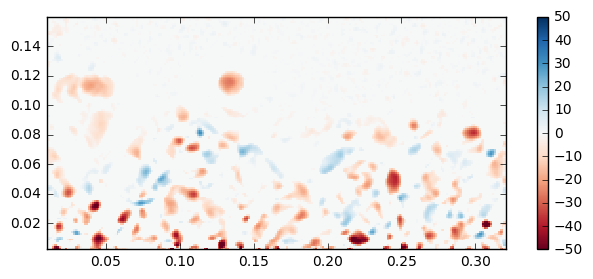

In [3]:
plt.figure(figsize = [8,3])
plt.pcolor(X,Y,Swirl[:,:,1], cmap='RdBu');
plt.clim([-50, 50])
plt.axis('scaled')
plt.xlim([X.min(), X.max()])
plt.ylim([Y.min(), Y.max()])
plt.colorbar()

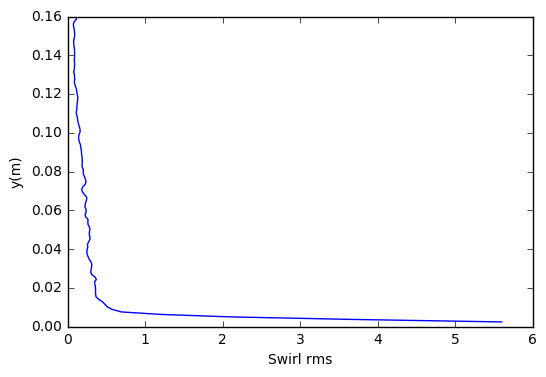

In [4]:
#Find profile of swirl std
SwirlStd = np.std(np.nanmean(Swirl,axis=2),axis = 1)
plt.plot(SwirlStd,Y[:,1])
plt.ylabel('y(m)')
plt.xlabel('Swirl rms')

In [5]:
Y[1].shape

(242,)

In [6]:
SwirlStd.shape

(123,)

In [4]:
#Normalize field by the std of Swirl
Swirl = Swirl/SwirlStd.reshape(uSize[0],1,1) #match the SwirlStd length (123) with the correct index in Swirl (also 123)

NameError: name 'SwirlStd' is not defined

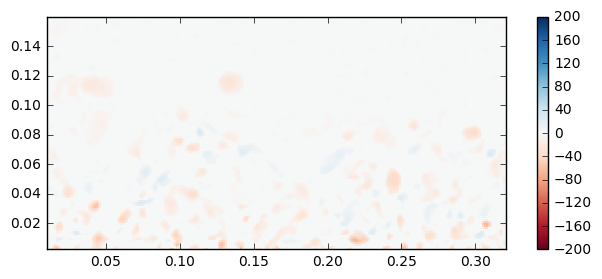

In [5]:
plt.figure(figsize = [8,3])
plt.pcolor(X,Y,Swirl[:,:,1], cmap='RdBu');
plt.clim([-200, 200])
plt.axis('scaled')
plt.xlim([X.min(), X.max()])
plt.ylim([Y.min(), Y.max()])
plt.colorbar()

In [6]:
Swirl[NanLocs] = 0   #Get rid of nans for now

# Estimate background

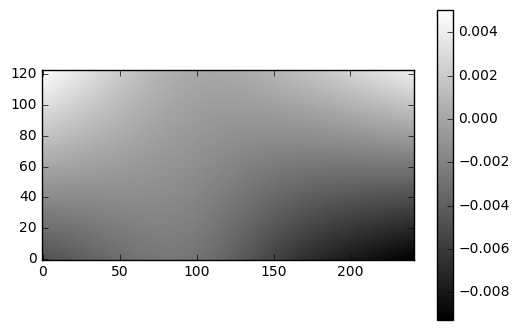

In [7]:
bkg = sep.Background(np.ascontiguousarray(Swirl[:,:,1]))
bkg_image = bkg.back()
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

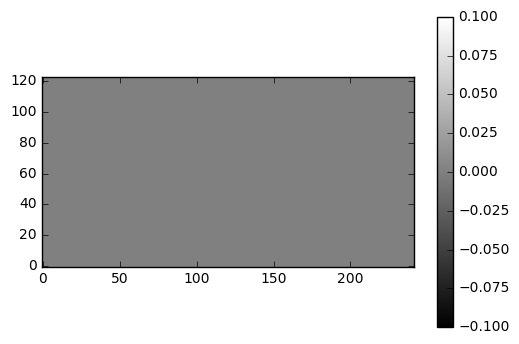

In [8]:
bkg_rms = bkg.rms()
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();

# Now extract objects

In [ ]:
#creat filter kernal
kern = np.array([[1,2,1], [2,4,2], [1,2,1]])      #Basic default kernal

kern = np.array([[1,2,4,2,1],[2,3,5,3,2],[3,6,8,6,3],[2,3,5,3,2],[1,2,4,2,1]])      #Basic default kernal

from scipy.stats import multivariate_normal as mvnorm

x = np.linspace(-5, 5, 100)
y = mvnorm.pdf(x, mean=0, cov=1)
#plt.plot(x,y)
#mvnorm.pdf(

x = np.mgrid[-1:1:.01]
y = x;
r = (x**2+y**2)**0.5
kern = np.empty(x.shape)
#for i in kern.shape[0]
#    kern[i,:] = mvnorm.pdf(r[i,:], mean=0, cov=1)
    
#plt.imshow(kern)

#y = mvnorm.pdf(x, mean=0, cov=1)
#pos = np.empty(x.shape + (2,))l
#pos[:, :, 0] = x; pos[:, :, 1] = y

In [74]:
x = np.mgrid[-10:10:1]
x.shape

(20,)

In [14]:
objects = sep.extract(np.ascontiguousarray(Swirl[:,:,1]), 1.5, err=bkg.globalrms,filter_kernel=kern)

np.ascontiguousarray(Swirl[:,:,1]).flags how to make array C contiguous

In [52]:
len(objects)

57

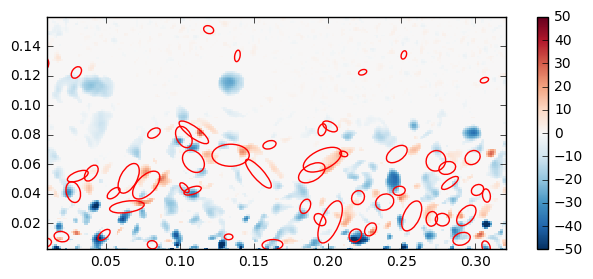

In [15]:
from matplotlib.patches import Ellipse

#fig, ax = plt.subplots()
plt.figure(figsize = [8,3])
plt.pcolor(X,Y,Swirl[:,:,1], cmap='RdBu_r');
ax = plt.gca()
plt.clim([-50, 50])
plt.axis('scaled')
plt.xlim([X.min(), X.max()])
plt.ylim([Y.min(), Y.max()])
plt.colorbar()

scale = (X[1,-1]-X[1,1])/uSize[1]
#plt.plot(objects['x']*scale,objects['y']*scale,'go')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i]*scale, objects['y'][i]*scale),
                width=6*objects['a'][i]*scale,
                height=6*objects['b'][i]*scale,
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [13]:

#objects['x']
scale = (X[1,-1]-X[1,1])/uSize[1]
objects['x']*scale

array([ 0.08121172,  0.1628138 ,  0.3071177 ,  0.00181404,  0.00809907,
        0.13279065,  0.29076344,  0.01973563,  0.04861494,  0.21885154,
        0.09020882,  0.22902161,  0.00943356,  0.07659338,  0.27765189,
        0.27051772,  0.25700055,  0.19477567,  0.20198665,  0.15399035,
        0.2940052 ,  0.30083928,  0.06403406,  0.18486947,  0.23868502,
        0.22060494,  0.00578485,  0.00167784,  0.24831657,  0.30750801,
        0.30139386,  0.10858102,  0.10304454,  0.17658349,  0.09649234,
        0.11732664,  0.2828056 ,  0.07716597,  0.26550892,  0.25529876,
        0.02778939,  0.03083588,  0.04007531,  0.22496476,  0.05500456,
        0.06533615,  0.07224873,  0.15289447,  0.08986243,  0.10914521,
        0.28104717,  0.2733653 ,  0.29819921,  0.18953667,  0.19607011,
        0.21106559,  0.13444699,  0.18081771,  0.07195001,  0.16066294,
        0.09451848,  0.24690735,  0.24724393,  0.08241664,  0.25905258,
        0.10267216,  0.10937984,  0.28602864,  0.00127974,  0.19

In [14]:
X[objects['x'],objects['y']]

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
objects['x']